PLA6619 Introduction to Urban Data and Informatics I \
Tuesday, October 6, 2020 \
Week05

# Lab 04

Please submit __Lab04.ipynb with outputs__ on Canvas by 11:59pm (EST). It doesn't need to be perfect, but your submission will be reflected in attendance and participation. The solution of this notebook will be shared on Wednesday.

1. Data access through Open APIs
2. More scripting practices

## Resource: 
* How to get started with NYC Open Data (https://opendata.cityofnewyork.us/how-to/)
* Socrata APIs resource (https://dev.socrata.com/docs/queries/)

# Load required packages

In [2]:
# To ignore unimporant system warnings
import warnings
warnings.filterwarnings("ignore")

# We will use Pandas, Numpy, and Matplotlib which is a package for visualization with Python
import pandas as pd
import numpy as np

# Load a required package 
# This is a library for accessing and parsing data through URLs
from urllib.parse import urlencode
import urllib.request, json 

import matplotlib.pyplot as plt
import seaborn as sns # visualization styling package

# A magic functin that renders the figure in a notebook 
%matplotlib inline 

# PART 1. Exploring NYC Open Data
### 1. Go to https://opendata.cityofnewyork.us/
### 2. Click 'Data'

# PART 2. Accessing data
### 1. Access the dataset
 * 'NYC Health + Hospitals patient care locations - 2011'
 * You can either click the 'Health' category or
 * Use a search box
### 2. Click the 'View Data' botton

### 3. You can download the dataset through 'Export' menue
* You can specify a preferred file format (csv, json, etc.)
* What is JSON?

JSON (JavaScript Object Notation) is our most commonly used format. JSON is a text-based open standard derived from the format used to represent simple data structures in JavaScript. Although it is rooted in JavaScript, it is language-agnostic and parsers exist for all popular (and many unpopular) languages.

When JSON is specified as the format, the response will be a JSON array, where each element in the array is a result. The key will be the column’s field name and the value will be the result. Fields with null values are omitted. For example:

![title](https://dzone.com/storage/temp/13237722-json-samples.png)

The format is designed to be easily human-readable, and should also be immediately parsable by all common JSON parsers.

### 4. Accessing data using APIs
* without any download processes
* Click 'Export' and click the 'SODA API' tab
* Resources for this dataset and APIs: https://dev.socrata.com/foundry/data.cityofnewyork.us/f7b6-v6v3

In [17]:
# # Load a required package 
# # This is a library for accessing and parsing data through URLs
# from urllib.parse import urlencode
# import urllib.request, json 

In [22]:
# Let's use the csv format first.
API = 'https://data.cityofnewyork.us/resource/f7b6-v6v3.csv?'

In [24]:
hospitals = pd.read_csv(API)
hospitals.head()

,facility_type,borough,facility_name,cross_streets,phone,location_1,postcode,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
0,Child Health Center,Brooklyn,Ida G. Israel Community Health Center,W. 22nd St. & W. 23rd St.,718-946-3400,"2201 Neptune Avenue\nBrooklyn, NY 11224\n(40.5...",11224.0,40.578468,-73.989614,13.0,47.0,348.0,3188417.0,3.069900e+09,Seagate-Coney Island ...
1,Child Health Center,Queens,South Queens Community Health Center,NaN,718-883-6699,"114 02 Guy R Brewer Blvd\nJamaica, NY 11434\n(...",11434.0,40.688615,-73.785593,12.0,28.0,276.0,4264631.0,4.122000e+09,Baisley Park ...
2,Child Health Center,Bronx,Melrose Houses Child Health Clinic,between Morris Ave. & Courtlandt Ave.,718-292-2820,"348 156th Street\nBronx, NY 10451\n(40.8213011...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Child Health Center,Bronx,Daniel Webster Houses Child Health Clinic,corner of Webster Ave.,718-538-2147,"401 168th Street\nBronx, NY 10456\n(40.8322798...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Diagnostic & Treatment Center,Bronx,Segundo Ruiz Belvis Diagnostic & Treatment Center,NaN,718-579-4000,"545 142nd Street\nBronx, NY 10454\n(40.8101218...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# The same data, but JSON format
query = ("https://data.cityofnewyork.us/resource/f7b6-v6v3.json?"
         "$select=*" # select all (SQL like query)
        ) 
hospitals_json = json.loads(urllib.request.urlopen(query).read().decode())
hospitals_json[0]

{'facility_type': 'Child Health Center',
 'borough': 'Brooklyn',
 'facility_name': 'Ida G. Israel Community Health Center',
 'cross_streets': 'W. 22nd St. & W. 23rd St.',
 'phone': '718-946-3400',
 'location_1': {'latitude': '40.578488319967',
  'longitude': '-73.989497148121',
  'human_address': '{"address": "2201 Neptune Avenue", "city": "Brooklyn", "state": "NY", "zip": "11224"}'},
 'postcode': '11224',
 'latitude': '40.578468',
 'longitude': '-73.989614',
 'community_board': '13',
 'council_district': '47',
 'census_tract': '348',
 'bin': '3188417',
 'bbl': '3069900001',
 'nta': 'Seagate-Coney Island                                                       ',
 ':@computed_region_efsh_h5xi': '18184',
 ':@computed_region_f5dn_yrer': '21',
 ':@computed_region_yeji_bk3q': '2',
 ':@computed_region_92fq_4b7q': '45',
 ':@computed_region_sbqj_enih': '35'}

In [35]:
# Convert the JSON data to Pandas dataframe
df_hospitals = pd.DataFrame.from_dict(hospitals_json)
df_hospitals.head(2)

,facility_type,borough,facility_name,cross_streets,phone,location_1,postcode,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,Child Health Center,Brooklyn,Ida G. Israel Community Health Center,W. 22nd St. & W. 23rd St.,718-946-3400,"{'latitude': '40.578488319967', 'longitude': '...",11224,40.578468,-73.989614,13,47,348,3188417,3069900001,Seagate-Coney Island ...,18184,21,2,45,35
1,Child Health Center,Queens,South Queens Community Health Center,NaN,718-883-6699,"{'latitude': '40.676945262114', 'longitude': '...",11434,40.688615,-73.785593,12,28,276,4264631,4122000052,Baisley Park ...,24669,41,3,46,71


# PART 3. Accessing NYC 311 Dataset (APIs)
* Resource: https://dev.socrata.com/foundry/data.cityofnewyork.us/erm2-nwe9
* You can get an API endpoint here: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data (Export tab)

### 1. Get the API endpoint

In [44]:
API = 'https://data.cityofnewyork.us/resource/erm2-nwe9.csv?'

### 2. Query data 
The Socrata APIs provide rich query functionality through a query language we call the “Socrata Query Language” or “SoQL”. As its name might suggest, it borrows heavily from Structured Query Language (SQL), used by many relational database systems. Its paradigms should be familiar to most developers who have previously worked with SQL, and are easy to learn for those who are new to it.
* Basic query clauses (select, where, etc.): https://dev.socrata.com/docs/queries/
* You can also refer to SQL syntax

In [50]:
# Let's get data collected on last Saturday (10/03/2020)

query1 = {'$select': '*',
         '$where': 'created_date>="2020-10-03" and created_date<"2020-10-04"', 
         '$limit': 100000} # if you don't specify 'limit', it returns 1000 rows as default

df1 = pd.read_csv(API + urlencode(query1),
                 parse_dates = ['created_date'],
                 dtype = {'incident_zip':'str'})
df1.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,47766331,2020-10-03 00:00:00,NaN,DOHMH,Department of Health and Mental Hygiene,Standing Water,Other - Explain Below,Other,11420,111-48B LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.680205,-73.821223,"\n, \n(40.68020492794727, -73.8212234289382)"
1,47766350,2020-10-03 00:00:00,NaN,DOHMH,Department of Health and Mental Hygiene,Standing Water,Swimming Pool - Unmaintained,1-2 Family Dwelling,11374,63-35 BOURTON STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.725319,-73.866853,"\n, \n(40.72531940604121, -73.86685327003985)"
2,47772020,2020-10-03 00:00:00,NaN,DOHMH,Department of Health and Mental Hygiene,Standing Water,Other - Explain Below,Other,11414,162-42 92 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.653303,-73.839456,"\n, \n(40.653302753837394, -73.83945574482557)"
3,47758525,2020-10-03 00:00:06,2020-10-03T01:20:34.000,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11203,594 TROY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.659046,-73.936994,"\n, \n(40.65904630443427, -73.93699431097996)"
4,47755556,2020-10-03 00:00:10,NaN,DOT,Department of Transportation,Sidewalk Condition,Broken Sidewalk,Sidewalk,11237,1146 FLUSHING AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.706041,-73.925686,"\n, \n(40.70604105168694, -73.92568591991845)"


In [53]:
print (len(df1))
print (df1['created_date'].min())
print (df1['created_date'].max())

# df1.dtypes

8268
2020-10-03 00:00:00
2020-10-03 23:59:59


In [77]:
# Let's get the number of complaints by complaint types 
# using $group and
# sort values 

query2 = {'$select': 'complaint_type, count(*) as total_counts',
         '$group': 'complaint_type',
         '$order': 'total_counts DESC',
         '$limit': 100000} 

df2 = pd.read_csv(API + urlencode(query2),
                 )
df2.head()

,complaint_type,total_counts
0,Noise - Residential,2124584
1,HEAT/HOT WATER,1323472
2,Illegal Parking,1053580
3,Street Condition,1006510
4,Blocked Driveway,1001156


### Exercise: Try to get monthly total 311 service requests using API query
* Hint: date_trunc_ym(...)
* For the information: https://dev.socrata.com/docs/datatypes/floating_timestamp.html#,

In [81]:
# Let's get the number of complaints by complaint types 
# using $group and
# sort values 

query3 = {'$select': 'date_trunc_ym(created_date) as ym, count(*) as total_counts',
         '$group': 'ym',
         '$order': 'ym',
         '$limit': 100000} 

df3 = pd.read_csv(API + urlencode(query3),
                  parse_dates = ['ym']
                 )
df3.head()

,ym,total_counts
0,2010-01-01,182117
1,2010-02-01,159489
2,2010-03-01,198639
3,2010-04-01,162854
4,2010-05-01,158039


Text(0, 0.5, 'Total 311 service requests')

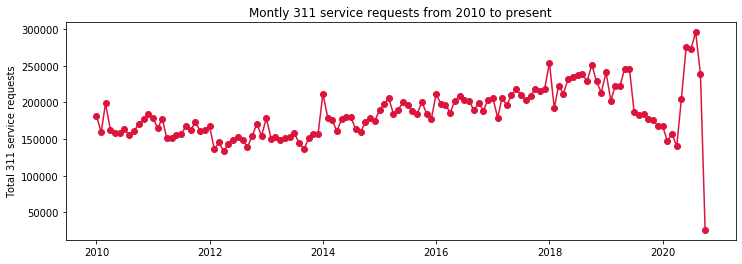

In [83]:
# Keeping just date part
df3['date'] = df3['ym'].dt.date

df3 = df3.set_index('date') # set index for plotting time series

plt.figure(figsize=(12,4))
plt.plot(df3['total_counts'], color='crimson', marker='o')
plt.title('Montly 311 service requests from 2010 to present')
plt.ylabel('Total 311 service requests')

### Exercise: Try to get all NYPD complaints in last September with latitude and longitude information
* agency = "NYPD"

In [166]:
query4 = {'$select': 'agency, created_date, latitude as y, longitude as x',
         '$where': 'created_date >= "2020-09-01" and created_date < "2020-10-01" and agency="NYPD"',
         '$limit': 500000} 

df4 = pd.read_csv(API + urlencode(query4),
                 )
df4.head()

,agency,created_date,y,x
0,NYPD,2020-09-24T23:26:56.000,40.710795,-73.957787
1,NYPD,2020-09-25T00:32:49.000,40.671187,-73.916990
2,NYPD,2020-09-25T00:08:11.000,40.836349,-73.887263
3,NYPD,2020-09-24T23:23:41.000,40.660018,-73.960966
4,NYPD,2020-09-24T23:54:50.000,40.636831,-74.137780


In [167]:
print (len(df4))

140017


### 3. Scatter plot as geographical viz

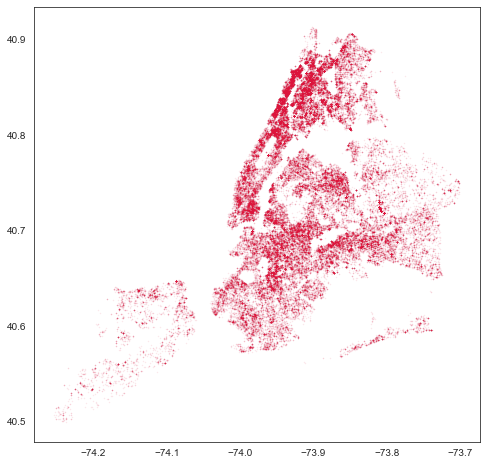

In [184]:
plt.figure(figsize=(8,8))
plt.scatter(df4.x, df4.y, s=0.2, alpha=0.1, color='crimson')
# plt.hexbin(df4.x, df4.y, gridsize=(50,50), cmap=plt.cm.Pastel1
#            )

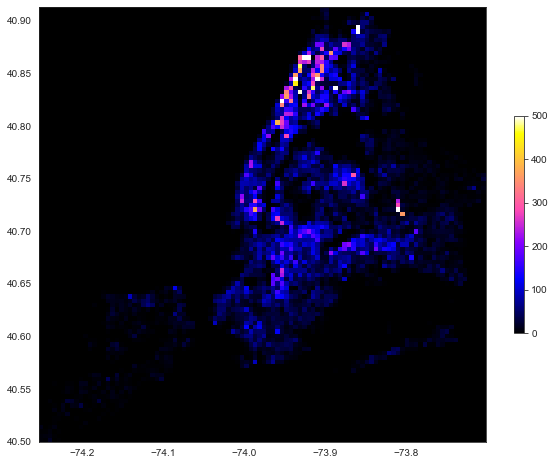

In [183]:
plt.figure(figsize=(10,8))
plt.hist2d(df4.x.dropna(), df4.y.dropna(), 
           bins=100,
          cmap='gnuplot2')
plt.clim(0,500)
plt.colorbar(shrink=0.5)
plt.show()

### 3. Export a dataset